In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from classifier import *
from ntk import *
from Q_minimization import *
from train import *

### Define Dimensions

In [4]:
n = 100
m = 20
d = 3

### Define Dataset

In [5]:
x = np.array([[1, -0.8, -0.5], [1, -0.4, -0.5], [1, 0.15, 0.3]])
y = np.array([[1.0, -1.0, 1.0]]).reshape(-1,)

In [6]:
def create_sample():
    cluster_centers = [-0.8, 0, 0.8]
    choice = np.random.choice(cluster_centers, size=2, replace=True)
    
    y_sample = -1
    if (choice[0] != -choice[1]) and not (choice[0] == 0.8 and choice[1] == 0):
        y_sample = 1    
    
    choice += np.random.normal(loc=0, scale=0.1, size=(2,))
    x_sample = np.concatenate([np.ones((1, )), choice])

    return x_sample.reshape(1, -1), y_sample

In [7]:
# samples = [create_sample() for _ in range(n)]
# x = np.concatenate([sample[0] for sample in samples])
# y = np.array([sample[1] for sample in samples]).reshape(-1,)

### Solve L1

In [8]:
w_0 = np.random.normal(loc=0, scale=1, size=(m, d))
a_0 = np.random.normal(loc=0, scale=1, size=(m,))

In [9]:
w_opt_L1, a_opt_L1 = solver(x, y, w_0, a_0, m, d, obj='L1')
w_opt_L1, a_opt_L1

(array([[ 1.69405613e-01, -3.82595463e-01,  6.44272089e-01],
        [-3.42532552e-01, -1.07059580e+00,  1.71411587e-01],
        [-1.75340995e-01, -5.48019163e-01,  8.77335873e-02],
        [ 7.84676580e-03,  6.76539469e-03,  1.03337230e-02],
        [ 7.61516459e-02, -1.72231552e-01,  2.90075927e-01],
        [ 2.41184994e-01,  5.64325566e-01, -1.08611311e+00],
        [ 3.56781506e-04,  4.59098142e-04, -7.86085128e-04],
        [ 4.90141442e-02,  1.14698334e-01, -2.20665380e-01],
        [-3.39612062e-01, -1.06127737e+00,  1.69797231e-01],
        [ 1.43709394e-01,  3.40082195e-01, -6.49073176e-01],
        [ 4.15677903e-02,  9.73385361e-02, -1.87238410e-01],
        [ 5.53127268e-05, -5.90997301e-07,  2.46219602e-05],
        [ 1.82970275e-02,  4.26778966e-02, -8.22249156e-02],
        [ 2.41954741e-03,  4.97804737e-03, -9.37162509e-03],
        [ 2.96038182e-01, -6.69462793e-01,  1.12764102e+00],
        [ 9.67935193e-04, -1.42462323e-03,  1.45484773e-03],
        [ 2.09485978e-04

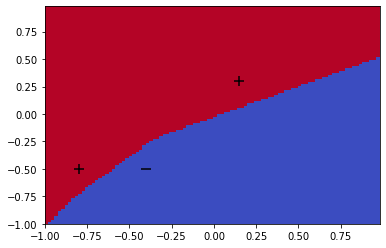

In [10]:
plot_classifier(w_opt_L1, a_opt_L1, x, y)

In [11]:
w_tilde_norms_opt_L1 = calc_w_tilde_norms(w_opt_L1, a_opt_L1)

In [12]:
minimal_margin(w_opt_L1, a_opt_L1, x, y)

0.9999993558726495

### Empirical Gradient Flow

In [ ]:
alpha = [10000] * m 
s = [0] * m

w_0, a_0 = symmetric_init(alpha=alpha, s=s,  m=m, d=d, symmetric=True)
results = train(
    w_0=w_0,
    a_0=a_0,
    x=x,
    y=y,
    m=m,
    d=d,
    alpha=alpha,
    s=s,
    step_size=1e-6,
    n_epochs=10000000,
    eval_freq=1000,
    eval_freq_Q=50000)

  1%|▏         | 143000/10000000 [00:49<48:04, 3417.78it/s] 

##### Plot weights norms over time

In [ ]:
plot([2 * alpha[0]/t for t in results['training_loss']], [np.linalg.norm(r, ord=1) for r in results['w_tilde_norms']], '.')
plot([2 * alpha[0]/t for t in results['training_loss']], [m * alpha[0] / t for t in results['training_loss']])
plot([2 * alpha[0]/t for t in results['training_loss_Q']], [np.linalg.norm(r, ord=1) for r in results['w_tilde_norms_Q']], 'v')

yscale('log')
xscale('log')
ylabel('L1 norm')
xlabel('mu');
title(f'L1 norm of  of (||~w_1||, ||~w_m||)');
legend(['GD', 'linear prediction', 'Q minimiazation']);

##### Plot NTK kerel change over time

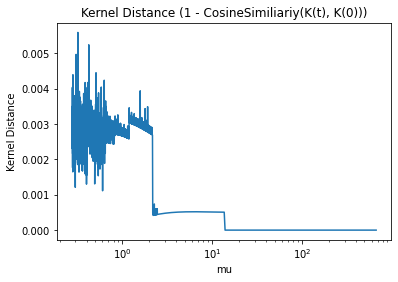

In [101]:
kernel_distances_smooth = pd.Series(results['kernel_distances']).rolling(10).mean()
plot([2 * alpha[0]/t for t in results['training_loss']], kernel_distances_smooth)
#yscale('log')
xscale('log')
ylabel('Kernel Distance')
xlabel('mu');
title(f'Kernel Distance (1 - CosineSimiliariy(K(t), K(0)))');

##### Plot decision boundary over time

In [102]:
mu_vals = [2 * alpha[0]/t for t in results['training_loss']]
max(mu_vals), min(mu_vals)

(6353.260916558694, 0.27297090313672645)

mu = 6353.260916558694


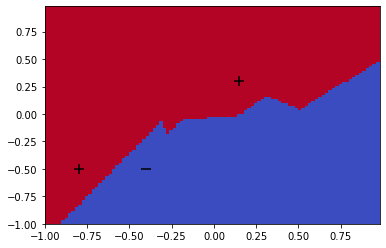

mu = 33.76698034246115


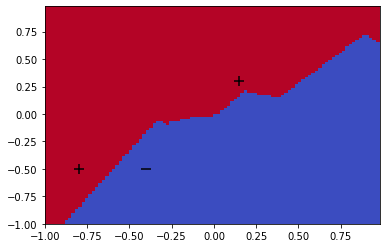

mu = 16.899242123398086


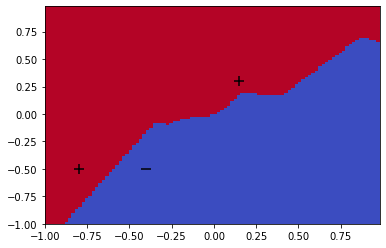

mu = 11.304756487130017


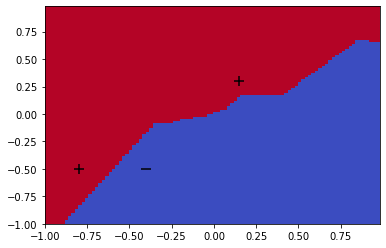

mu = 8.497066371504431


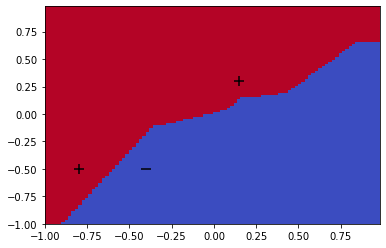

mu = 6.7886725484826265


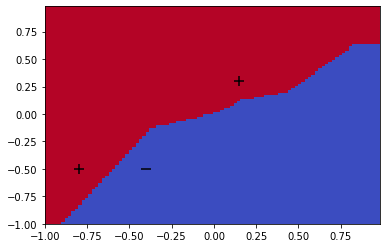

mu = 5.636819327342258


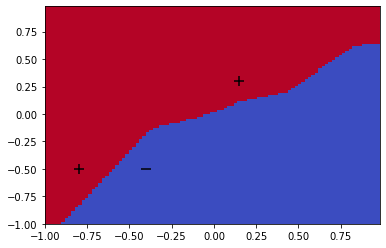

mu = 4.805647812356231


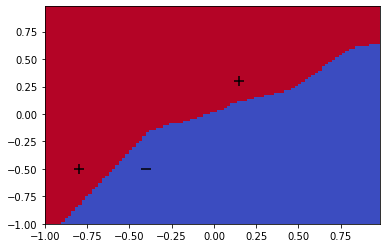

mu = 4.176156734719777


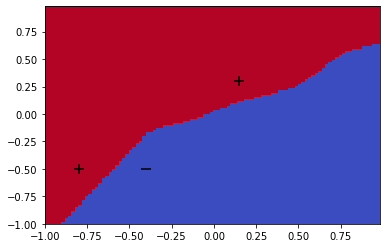

mu = 3.6818139677068724


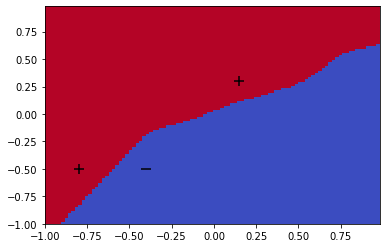

mu = 3.2825148443998025


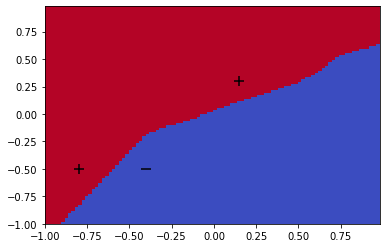

mu = 2.9526492452377466


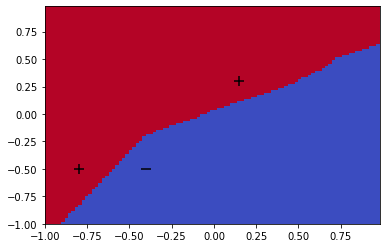

mu = 2.6750982354442967


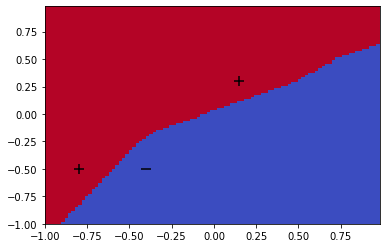

mu = 2.43813672630813


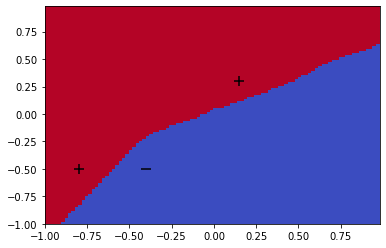

mu = 2.2347304506320955


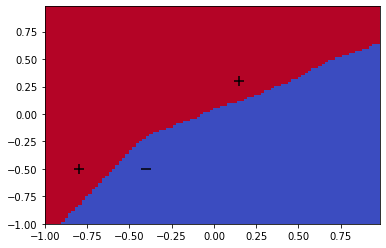

mu = 2.06133314843306


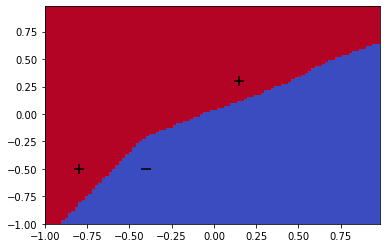

mu = 1.909521238281458


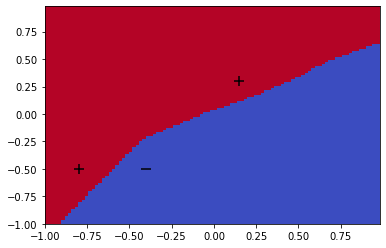

mu = 1.7738345786941885


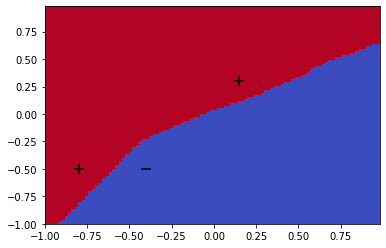

mu = 1.6517635545182727


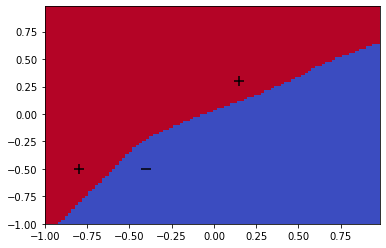

mu = 1.541309242412697


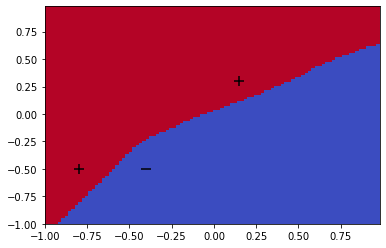

mu = 1.440859386200493


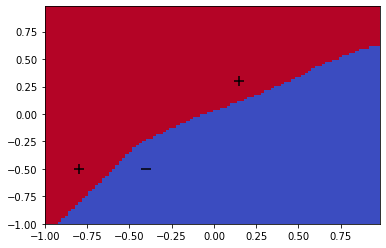

mu = 1.3490987848362368


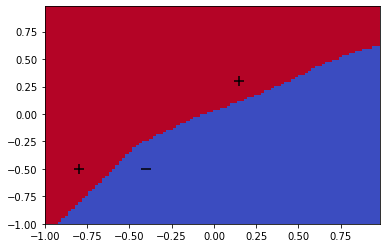

mu = 1.2649433041887828


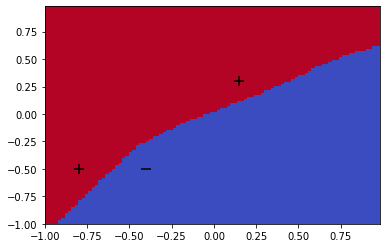

mu = 1.1875260107155312


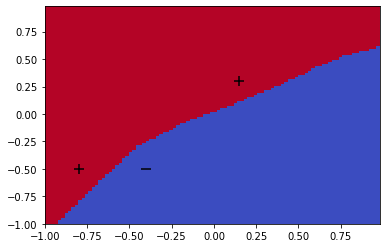

mu = 1.117112663437868


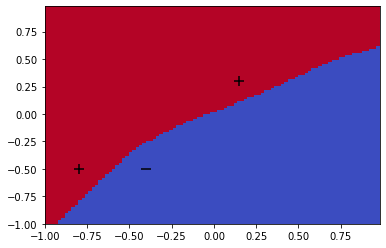

mu = 1.0517794438928223


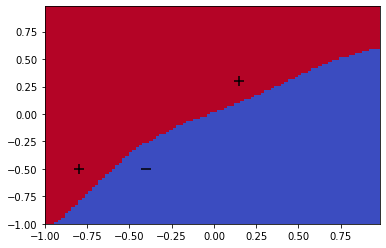

mu = 0.9910191522135111


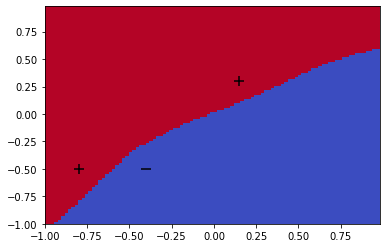

mu = 0.9343947655261753


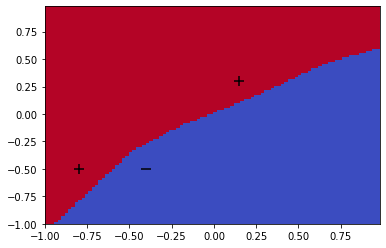

mu = 0.8815271451654352


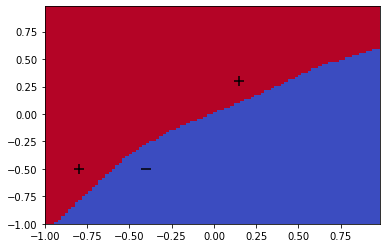

mu = 0.8322191683159018


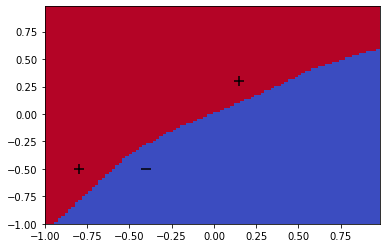

mu = 0.7869181258111791


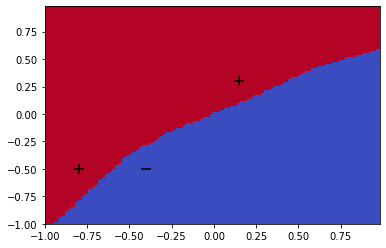

mu = 0.7443679234904371


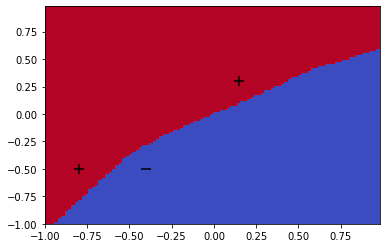

mu = 0.704317251621466


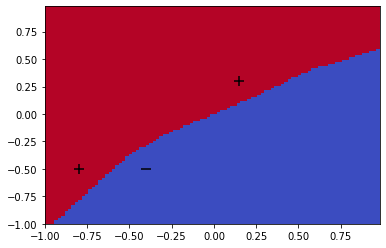

mu = 0.6668248634593582


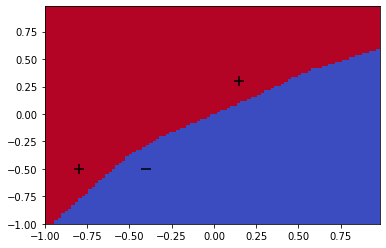

mu = 0.6316914859938563


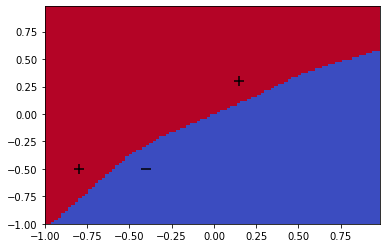

mu = 0.5985233846391875


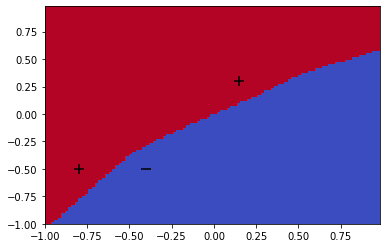

mu = 0.5671827676663804


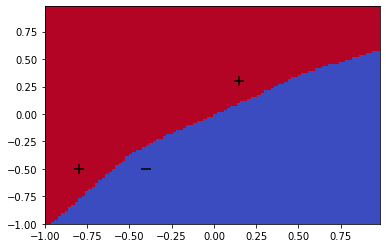

mu = 0.5375536872607443


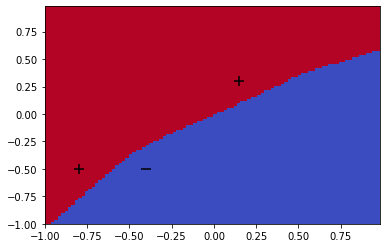

mu = 0.5095299426979787


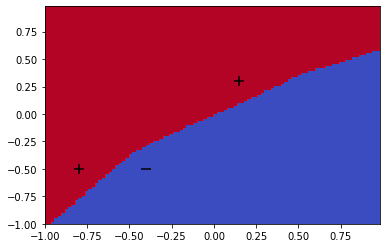

mu = 0.48301383669609477


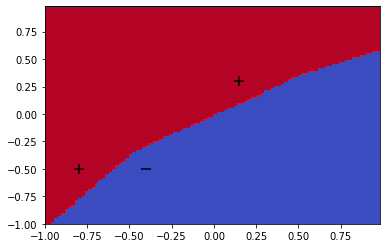

mu = 0.45791519309060597


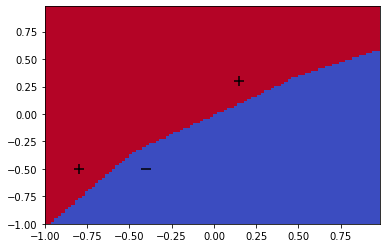

mu = 0.43444624426340933


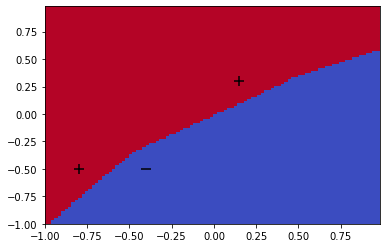

mu = 0.41248523608529725


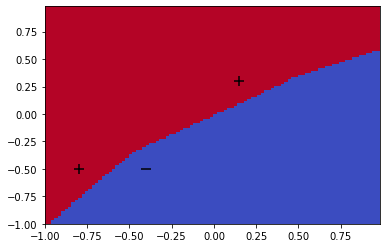

mu = 0.39166276249138904


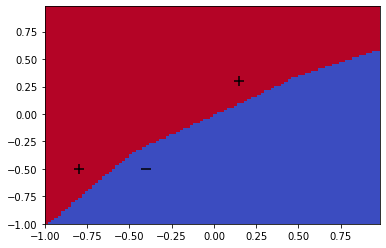

mu = 0.3719169731507341


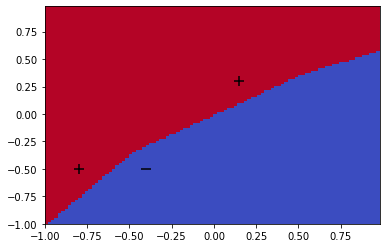

mu = 0.35318371459856573


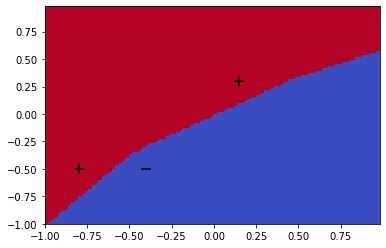

mu = 0.3354082005099961


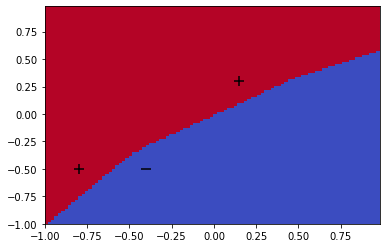

mu = 0.31853899249487605


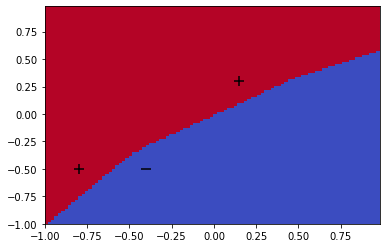

mu = 0.30252780489986447


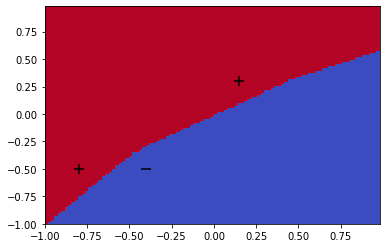

mu = 0.28732924479842653


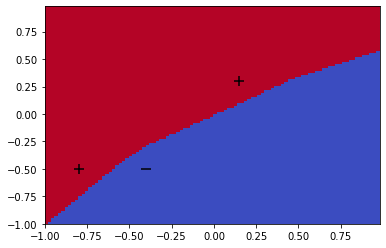

In [103]:
num_plots = 50
idx = 0
for i in range(num_plots):
    print("mu = {}".format(2 * alpha[0]/results['training_loss'][idx]))
    plot_classifier(results['w'][idx], results['a'][idx], x, y)
    idx += len(results['training_loss']) // num_plots    

##### NTK solution

In [104]:
clf = fit_svm_with_tangent_kernel(w_0, a_0, x, y)

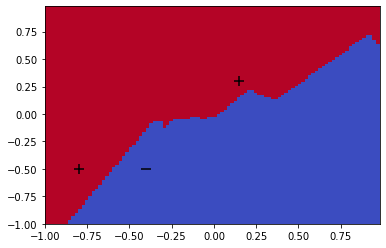

In [105]:
plot_svm_classifier(clf, x, y)

##### Plot excess L1 over time

In [106]:
excesss_L1 = [np.linalg.norm(w_tilde_norms, ord=1) / np.linalg.norm(w_tilde_norms_opt_L1, ord=1) - 1 
              for w_tilde_norms in results['w_tilde_norms']]

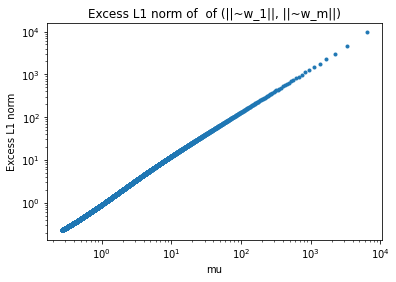

In [107]:
plot([2 * alpha[0]/t for t in results['training_loss']], excesss_L1, '.')

yscale('log')
xscale('log')
ylabel('Excess L1 norm')
xlabel('mu');
title(f'Excess L1 norm of  of (||~w_1||, ||~w_m||)');

### Empirical Gradient Flow- Comparing Different Scales

In [108]:
# TODO

### The Effect of Shape

In [115]:
alpha = [10000] * m
s = [0.95] * (m//2) + [0] * (m//2)

w_0, a_0 = symmetric_init(alpha=alpha, s=s,  m=m, d=d, symmetric=False) # using general non-symmetric init here to allow
                                                                        # each neuron to be independent with its own shape
results = train(
    w_0=w_0,
    a_0=a_0,
    x=x,
    y=y,
    m=m,
    d=d,
    alpha=alpha,
    s=s,
    step_size=1e-6,
    n_epochs=10000000,
    eval_freq=1000,
    eval_freq_Q=np.inf)  # don't eval Q

100%|██████████| 1000000/1000000 [00:52<00:00, 18901.35it/s]


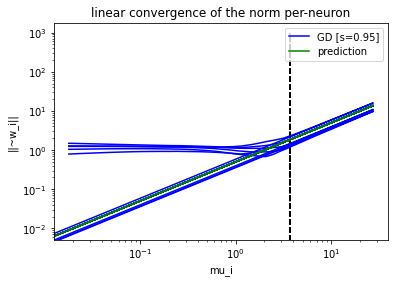

In [118]:
for i in range(m//2):
    marker = 'b'
    plot([2 * alpha[i]/t for t in results['training_loss']], [r[i] for r in results['w_tilde_norms']], marker)
    plot([2 * alpha[i]/t for t in results['training_loss']], [alpha[i] / gamma_tilde for gamma_tilde in results['training_loss']], 'g')

    first_perfect_fit_index = np.where(np.array(results['training_accuracy']) == 1.0)[0][5]
    first_perfect_fit_mu = 2 * alpha[i]/results['training_loss'][first_perfect_fit_index]
    vlines(first_perfect_fit_mu, 0, 1e3, linestyles='dashed', color='k')

yscale('log')
xscale('log')
ylabel('||~w_i||');
xlabel('mu_i');
title(f'linear convergence of the norm per-neuron');
legend(['GD [s=0.95]', 'prediction']);

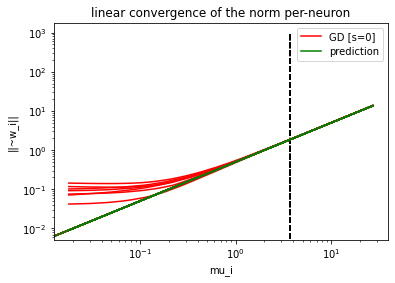

In [119]:
for i in range(m//2, m):
    marker = 'r'
    plot([2 * alpha[i]/t for t in results['training_loss']], [r[i] for r in results['w_tilde_norms']], marker)
    plot([2 * alpha[i]/t for t in results['training_loss']], [alpha[i] / gamma_tilde for gamma_tilde in results['training_loss']], 'g')

    first_perfect_fit_index = np.where(np.array(results['training_accuracy']) == 1.0)[0][5]
    first_perfect_fit_mu = 2 * alpha[i]/results['training_loss'][first_perfect_fit_index]
    vlines(first_perfect_fit_mu, 0, 1e3, linestyles='dashed', color='k')

yscale('log')
xscale('log')
ylabel('||~w_i||');
xlabel('mu_i');
title(f'linear convergence of the norm per-neuron');
legend(['GD [s=0]', 'prediction']);

### Plot q_s

Text(0.5, 1.0, 'q_s')

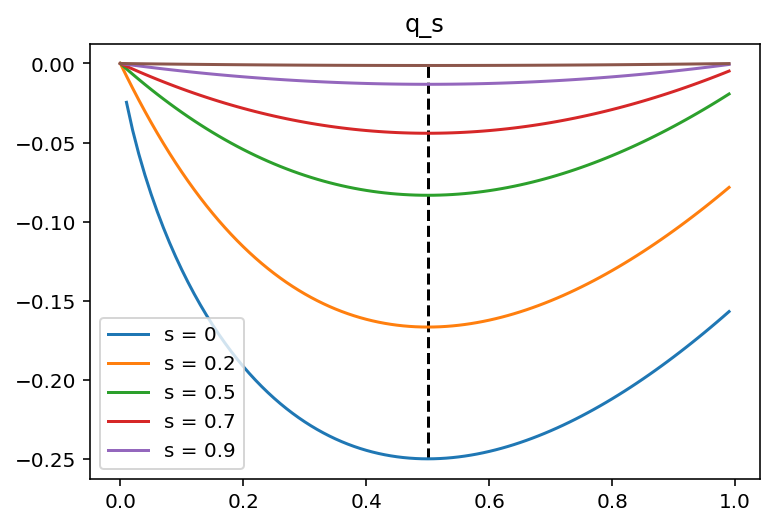

In [60]:
mu = 1
x = list(np.arange(0, mu, 0.01))
for s in [0, 0.2, 0.5, 0.7, 0.9, 0.99]:
    plot(x, list(map(lambda x: q_func(x/mu, s), x)))
    
vlines(0.5, -0.25, 0, linestyles='dashed')
legend([f's = {k}' for k in [0, 0.2, 0.5, 0.7, 0.9]])
title('q_s')